## Pobranie danych z pliku

In [9]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Resampling klas

In [11]:
from imblearn.over_sampling import ADASYN

X_train, Y_train = ADASYN().fit_resample(X_train, Y_train)

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Inicjacja struktur danych do testów

In [12]:
scores_false_negative = []
scores_false_positive = []
methods = []


## Wybór metody

### PCA

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


random_forest = make_pipeline(StandardScaler(), PCA(n_components=15), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("PCA")

[[71055    27]
 [   20   100]]


### Feature aglomeration

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import datasets, cluster
random_forest = make_pipeline(StandardScaler(), cluster.FeatureAgglomeration(n_clusters=15), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("Feature Aglomeration")

[[71070    12]
 [   21    99]]


### KBest

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

random_forest = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=15), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("K Best")

[[71067    15]
 [   18   102]]


### Variance threshold

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold

random_forest = make_pipeline(StandardScaler(), VarianceThreshold(threshold=0.8), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("Variance threshold")

[[71069    13]
 [   20   100]]


### Recursive feature elimination 

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


random_forest = make_pipeline(StandardScaler(), RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=15, step=4), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("RFE")

[[71066    16]
 [   19   101]]


NameError: name 'features_number' is not defined

In [ ]:
rfe = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=15, step=4)
rfe.fit(X_train, Y_train)
print(rfe.score(X_train, Y_train))

In [ ]:
print(rfe.ranking_)

###  Gaussian random projection

In [20]:
from sklearn import random_projection

methods.append("RFE")
random_forest = make_pipeline(StandardScaler(), random_projection.GaussianRandomProjection(n_components=15), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("GRP")

[[71049    33]
 [   39    81]]


## Wyniki

### False negative

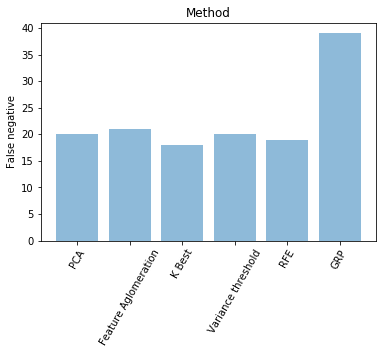

In [23]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

### False positive

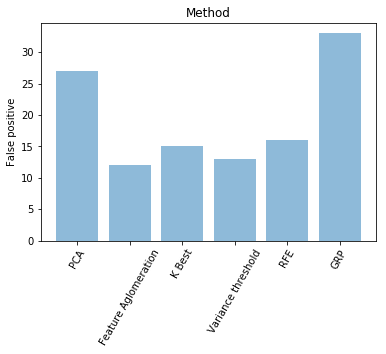

In [22]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False positive')
plt.title('Method')

plt.show()